In [ ]:
#!git clone https://github.com/neuralcomputer/ML_School.git

# Тема № 17 . Машины опорных векторов

## Линейные машины опорных векторов
На предыдущем занятии мы рассмотрели линейную и логистическую регрессии и увидели, что они разделяют классы с помощью линейных функций (прямая линия, плоскость, гиперплоскость).

Для задачи классификации в примере на рисунке, где надо отличить два класса, разделяющая поверхность для линейной регрессии это прямая линия. Можно нарисовать линии уровня выхода линейной регрессии, т.е. кривые, на которых выход одинаков. Это получится набор прямых линий, параллельных разделяющей (проверьте !), масштаб их зависит от величины параметров, можно ввести соответствующую шкалу. Введя кодировку для классов (например -1 и +1) линейная регрессия пытается найти такую разделяющую прямую, для которой суммарные значения квадратов отличия выходов от требуемых были как можно меньше. Если есть примеры (точки на графике), которые очень далеки от разделяющей прямой, то они будут давать большую ошибку, и линейная регрессия будет стремиться угодить им даже в ущерб другим точкам.

Кроме того, для решения задачи классификации подойдет любая прямая, которая разделит классы, и по серединке и ближе к краям, с разным наклоном и т.п. 

![img](https://drive.google.com/uc?id=1tvOS00k8ICD0_ArfSO4WqR0jDxXZKw0X)


Ученые подумали, ведь если нам надо разделить классы, то зачем вообще обращать внимание на все точки-примеры, давайте искать такую прямую, которая бы разделила точки разных классов  промежутком как можно большей ширины! Тогда из всех возможных разделяющих поверхностей, будет выбрана такая, у которой свободный промежуток между данными максимальный. Понятно, что если мы уже нашли такую разделяющую прямую, а потом добавили новых данных соответствующего класса подальше от нее, то они никак не повлияют на величину промежутка (пунктир на рисунке), так что нужную разделяющую прямую определяют не все примеры-данные, а только некоторые, которые попадают на границу промежутка (или возможно внутрь него). Такие примеры-данные назвали **опорными векторами**, наше решение как-бы опирается на них, а модель, которая работает с опорными векторами, назвали **машина опорных векторов** (по английски Support Vector Machine, SVM).

Что бы подбирать параметры такой машины нужна функция ошибки. Давайте введем функцию ошибки:

* Мы всегда можем отмасштабировать наши данные так, чтобы значение выхода линейной зависимости на границах промежутка было плюс или минус 1 для заданных входов и будем указания  учителя **y** задавать также, -1 или +1, и промежуток установим для значений от -1 до +1. 
* Мы должны максимизировать ширину промежутка, она определяется как $ \frac{2}{||w||} = \frac{2}{\sqrt(w^T*w)} $, **w** - весовые коэффициенты линейной зависимости $ (s=w^T*x+b ) $ как в линейной регрессии. Максимизация такой величины эквивалентна минимизации величины $ (w^T*w) $ (почему?). 

* Если какое-то данное-пример попадает внутрь промежутка или вообще не со своей стороны от разделяющей прямой - за это надо штрафовать, делать добавку в функцию ошибки:
    1. Если должно было получиться y=+1, а получилось значение **s** большее 1, то это правильная классификация и штрафа не нужно
    2. Если должно было получиться y=+1, а получилось значение **s** меньше 1 , то это неправильная классификация и нужен штраф, подберем величину штрафа **g** (положительная величина или ноль) так, чтобы  s$\geq$1-g
    3. Если должно было получиться y=-1, а получилось значение **s** меньшее -1, то это правильная классификация и штрафа не нужно
    4. Если должно было получиться y=-1, а получилось значение **s** больше -1 , то это неправильная классификация и нужен штраф, подберем величину штрафа **g** (снова положительная величина или ноль) так, чтобы  s$\leq$-1+g
    5. Чтобы совместить условия в одной формуле, для каждого примера i запишем ее так:   
$ y_i*(w^T*x_i+b)\geq 1-g_i \\ $   
    и сложим штрафы для каждого примера
    
тогда минимизируем функцию ошибки $ E=w^T*w + C*\sum_i{g_i} $ по переменным w, b, g

при условии, что $ y_i*(w^T*x_i+b)\geq 1-g_i $ и \\(g_i \geq 0\\)

Здесь введен коэффициент **С** который определяет, что важней, выполнить условия или максимизировать ширину промежутка.
 <details> 
 <summary> <i>Дополнительно:</i> (нажмите)</summary>
Это задача *оптимизации с ограничениями*, которую трудно решить напрямую. Чтобы ее решить задачу переформулируют по другому, вводят коэффициенты \\(a_i\\) , их число равно числу примеров, такие, что:

$ \sum_i{y_i*a_i}=0 \\ 
0 \leq a_i \leq C \\
w=\sum_i{y_i*a_i*x_i} \\ $

и тогда решают задачу, как ее называют, "двойственную", которая дает те же решения, но проще реализуется в компьютере:

$ min_a \sum_i\sum_j{a_i*a_j*y_i*y_j*{x_i}^T*x_j} - \sum_i{a_i} \\ $

причем оказывается, что коэффициенты \\(a_i\\) не равны нулю только для опорных векторов **x**.
    
</details>   

В библиотеке `sklearn` за машины опорных векторов отвечает отдельный набор функций [`svm`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) и принято разделять применение этих машин для задач классификации [`svc`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) и регрессии [`svr`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR).  В библиотеке есть и другие реализации этих машин, отличающиеся деталями. 

Использование `SVС` почти такое же, как и линейной или логистической регрессии: имеет аналогичные поля `coef_` и `intercept_` для параметров, аналогичные методы `fit()`, `predict()`, `score()`, `get_params()`, `set_params()`, но также и дополнительные поля и методы, из которых отметим:
* поле `support_` - индексы опорных векторов.
* поле `support_vectors_` - сами опорные вектора (расположены в строках).
* поле `n_support_` - число опорных векторов для каждого класса.
* поле `classes_` - названия классов.
* метод `decision_function()` - вычисление величины **s** для заданного входа **x** (точнее для связанной с ней величины)
* при создании SVC мы указываем тип "ядра" `kernel`, пока будем говорить только про линейные ядра,`kernel='linear'`, а другие рассмотрим позже и узнаем зачем они нужны.

Давайте реализуем один [пример использования `SVC`](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py) и посмотрим, как влияет коэффициент **C** (что важнее, выполнение условий или максимизации ширины промежутка) на решение.  Для SVM первое измерение в данных - примеры, второе - размерность.

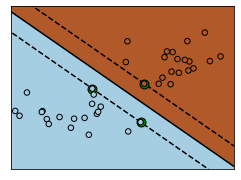

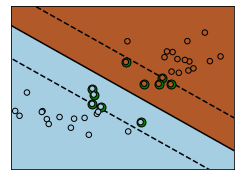

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm # подкючаем SVM

# сгенерируем  40 точек на плоскости
#np.random.seed(0) #
X = np.r_[np.random.randn(20, 2) - [2, 2], # первый класс случайно вокруг точки (-2,-2)
          np.random.randn(20, 2) + [2, 2]] # второй класс случайно вокруг точки (2,2)
Y = [0] * 20 + [1] * 20 # метки классов 20 штук - метка 0, 20 штук метка 1.
#(для классификатора это именно метки-названия, а не значения выхода, для регрессии - должны быть значения выхода)

fignum = 1 # номер рисунка

# проверим два варианта для C=1 (обе части важны) и 0.05 (ширна промежутка важнее) 
for name, penalty in (('unreg', 1), ('reg', 0.05)): #

    clf = svm.SVC(kernel='linear', C=penalty) # создаем SVC классификатор, ядро - линейное, коэффициент С - заданный
    clf.fit(X, Y) # обучаем модель

    # разделяющая прямая:
    w = clf.coef_[0] # параметры-множители линейной модели
    a = -w[0] / w[1] # коэффициент прямой
    xx = np.linspace(-5, 5) # ряд точек по оси ОХ
    yy = a * xx - (clf.intercept_[0]) / w[1] # уравнение прямой, clf.intercept_[0] - параметр-смещение модели

    # прямые, параллельные разделяющей, отстоящие от нее на 1/sqrt(||w||) 
    # в перпендикулярном направлении, что соответствует sqrt(1+a^2)/sqrt(||w||) в вертикальном    
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2)) # полуширина промежутка
    yy_down = yy - np.sqrt(1 + a ** 2) * margin # нижняя прямая границы промежутка
    yy_up = yy + np.sqrt(1 + a ** 2) * margin # верхняя прямая границы промежутка

    # рисуем прямые
    plt.figure(fignum, figsize=(4, 3)) # полотно для рисунка
    plt.clf() # очистка полотна
    plt.plot(xx, yy, 'k-') # разделяющая прямая
    plt.plot(xx, yy_down, 'k--') # нижняя граница, пунктир 
    plt.plot(xx, yy_up, 'k--') # верхняя граница, пунктир
    # отображаем опорные вектора (из поля clf.support_vectors_ ) 
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='g', zorder=5, edgecolors='k')
    # отображаем исходные данные
    plt.scatter(X[:, 0], X[:, 1], s=30,c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight') #
    x_min = -4.8 #
    x_max = 4.2 #
    y_min = -6 #
    y_max = 6 #
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # точки плоскости как входные данные
    # Пояснение: используется np.mgrid
    # https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html#numpy.mgrid
    # в которой аргумент step (третий) если он комплексный (символ j)  
    # означает сколько точек будет в сетке ВКЛЮЧАЯ начало и конец отрезка.
    # это просто способ записи, возможно не самый понятный, но иногда встречается.
    # т.е. здесь 200 точек по каждой оси, включая границы 
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # рассчитанные классы для них
    # обратите внимание, что благодаря ravel() и np.c_ получается массив нужной формы: много строк и 2 столбца 
    # print(np.c_[XX.ravel(), YY.ravel()].shape)
    #print(XX.shape)
    #print(Z.shape)
    # 
    Z = Z.reshape(XX.shape) # для рисования результат нужен в той же форме, что и XX
    #print(Z.shape)
    plt.figure(fignum, figsize=(4, 3)) # выбираем (или создаем) полотно для рисования
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired) # отображаем цвета на плоскости (много маленьких цветных квадратов) 

    plt.xlim(x_min, x_max) # границы отображения
    plt.ylim(y_min, y_max) #

    plt.xticks(()) # убираем деления на осях
    plt.yticks(()) #
    fignum = fignum + 1 # другое полотно для следующего примера

plt.show() # отображаем полотна

## Многоклассовая классификация на реальном наборе данных
В принципе SVM как и линейную и логистическую регрессии можно использовать для классификации на несколько классов, не только на два. Фактически это означает, что будет создано несколько SVM, каждая из которых учится отличать свой класс от всех других, поэтому и параметров будет больше. Синтаксис же практически не меняется. 

Давайте построим SVM классификатор для набора данных [`load_wine`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) из примеров `sklearn.datasets` с которым мы уже знакомы. В данных 3 класса, поэтому будет построено фактически три SVM, каждая со своими параметрами.

Для оценки качества классификации будем использовать метрики аккуратности (accuracy) и F1-меры (вспомните что это с предыдущих занятий).
Для их расчета используем функции из `sklearn.metrics`
* `accuracy_score`
* `f1_score`
которым указываем полученные  и действительные классы данных, способ усреднения и другие аргументы, если требуется. `'micro'` означает что примеры никак не будут группироваться и усреднение будет по всем примерам.  

Посчитаем и отобразим матрицу потерь с помощью  `confusion_matrix()` и `ConfusionMatrixDisplay()` соответственно.

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
(124, 13)
Множители (3, 13)
Смещения (3,)
Acc= 0.9259259259259259 F1= 0.9259259259259259


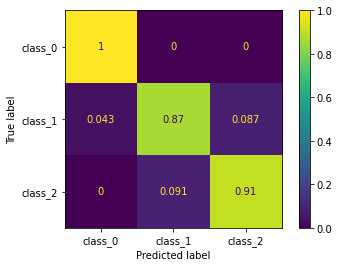

In [ ]:
from sklearn.datasets import load_wine
#import matplotlib.pyplot as plt
from sklearn import svm 

data_wine = load_wine() # загрузим набор данных
# названия признаков
print("Features: ", data_wine.feature_names)
# название классов
print("Labels: ", data_wine.target_names)

X = data_wine.data # признаки
y = data_wine.target # цели (индексы классов)

# функция для разделения данных на обучающие и тестовые
from sklearn.model_selection import train_test_split
# разделим данные на обучающие (70%) и тестовые (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)

clf = svm.SVC(kernel='linear')# создаем линейную SVM
clf.fit(X_train, y_train)# обучаем ее на обучающих данных
print('Множители',clf.coef_.shape)
print('Смещения',clf.intercept_.shape)
pred = clf.predict(X_test)# считаем классы для тестовых данных 

# функции для расчета метрик
from sklearn.metrics import accuracy_score # точночть
from sklearn.metrics import f1_score # f1 мера

accuracy = accuracy_score(y_test, pred) # средняя точночть
f1 = f1_score(y_test, pred, average="micro") # средняя f1 мера
#
print('Acc=',accuracy,'F1=', f1)

# матрица потерь 
from sklearn.metrics import confusion_matrix # для расчета матрицы
from sklearn.metrics import ConfusionMatrixDisplay # для ее отображения

cm = confusion_matrix(y_test, pred, normalize='true') # расчет матрицы

cm_display = ConfusionMatrixDisplay(cm,data_wine.target_names).plot()# ее отображения

## Нелинейные машины опорных векторов
Такие модели как линейная и логистическая регрессии и линейные машины опорных векторов могут разделять данные только с помощью линейной разделяющей поверхности, что в жизни встречается не так часто. Пример на рисунке ниже, здесь никак не провести одну прямую линию, которая разделила бы классы. 

![img](https://drive.google.com/uc?id=1TpdPWzmIprnNiV-GZJWvAkDIZGiE6eGu)

Но можно провести кривую (окружность, например)! Ах, если бы и модели могли строить кривые - нелинейные  - разделяющие поверхности. SVM при небольшой доработке - может!

Для нашего примера давайте придумаем какую-нибудь функцию, которая бы переводила точки из двумерного пространства в трехмерное, например в виде параболоида как на рисунке ниже.

![img](https://drive.google.com/uc?id=1Mj2fzqCtBGZQcZzNxKtbAt9PAFzW_xaM)
 
В этом трехмерном пространстве данные стали разделимы одной плоскостью - линейной поверхностью. Но если нарисовать проекцию такой линии раздела обратно на двумерную плоскость, то получится нелинейная кривая (эллипс - пересечение параболоида и плоскости), рисунок ниже.

![img](https://drive.google.com/uc?id=1C4YRhJ-3A2Lj5MfNJmc9rYrPgwx9RjPW)

Возьмем другую функцию, не параболоид, получим другие линии раздела, но тоже кривые. Значит все, что нам надо сделать - подобрать подходящую функцию для перевода входов в пространство большей размерности, там применить линейный SVM, а потом вернуться обратно к исходному пространству.

Математически перевод в другое пространство опишем как функцию **f(x)**. Тогда выход будет определяться уже нелинейной зависимостью от входа \\( s=w^T*f(x)+b \\) . 
Если внимательно присмотреться к функции ошибки для линейной SVM, то мы заметим, что в нее **x** входит не сам по себе, а в виде скалярных произведений \\( x_i^T*x_j \\), а тогда и для нелинейного случая нам нужны только скалярные произведения типа \\(K(x_i,x_j)= f(x_i)^T*f(x_j) \\), а не сама функция **f(x)**. Такие скалярные произведения называются **ядром** и их реализовано несколько разных видов:
* `linear` уже известное нам линейное  \\(K(x_i,x_j)= x_i^T*x_j \\)
* `poly` полиномиальное \\(K(x_i,x_j)= (\gamma*x_i^T*x_j+r)^d \\)
* `rbf` радиально-базисное (по умолчанию) \\(K(x_i,x_j)=e^{-\gamma*||x_i - x_j||^2} \\)
* `sigmoid` сигмоидальное (гипертангенс) \\(K(x_i,x_j)= tanh(\gamma*x_i^T*x_j+r) \\)
* `precomputed` произвольное - заранее рассчитанное в виде матрицы.

параметры \\(d,r,\gamma \\) задаются в аргументах `degree`, `coef0` `gamma` соответственно, а тип ядра в аргументе`kernel`. Синтаксис практически не изменяется. Давайте сравним несколько SVM с разными ядрами и построим их разделяющие поверхности для двумерной задачи. `LinearSVC()` - чуть-чуть по другому реализованный аналог `SVC()` с линейным ядром. 


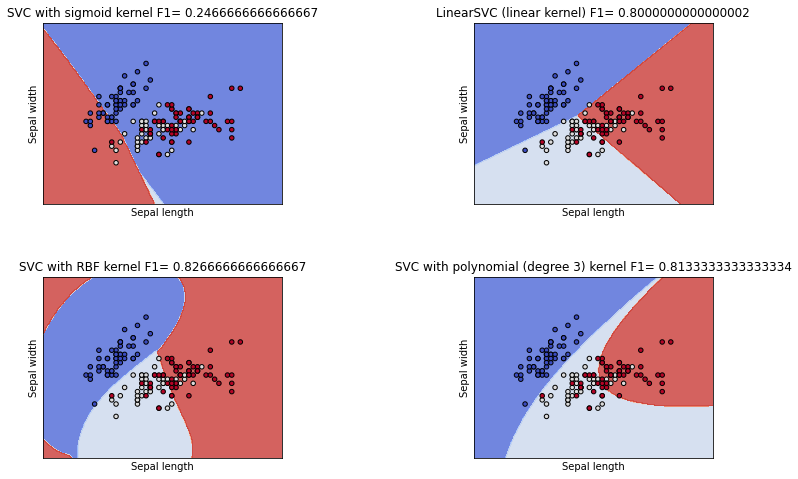

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import f1_score # f1 мера
# определим функцию, которая будет строить расчетную сетку на графике 
def make_meshgrid(x, y, h=.02):
    """ Создает сетку точек в двумерном пространстве

    Аргументы
    ----------
    x: координаты точек по оси ОХ
    y: координаты точек по оси ОУ
    h: шаг между точками, необязателен

    Возвращает
    -------
    xx, yy : массивы типа ndarray с координатами всех точек сетки
    """
    x_min, x_max = x.min() - 1, x.max() + 1 # минимум и максимум немного сдвинутые
    y_min, y_max = y.min() - 1, y.max() + 1 #
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # делаем сетку
                         np.arange(y_min, y_max, h)) #
    return xx, yy # возвращаем

# определим функцию, которая будет вычислять и рисовать разделяющие поверхности
def plot_contours(ax, clf, xx, yy, **params):
    """Вычисляет и рисует разделяющие поверхности.

    Аргументы
    ----------
    ax: оси matplotlib axes для рисования
    clf: классификатор
    xx: х координаты точек сетки, ndarray
    yy: y координаты точек сетки, ndarray
    params: дополнительные параметры отображения для contourf
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # расчитываем классы для точек, представив массивы в нужном формате
    Z = Z.reshape(xx.shape) # изменяем форму результата для рисования
    out = ax.contourf(xx, yy, Z, **params) # рисуем поверхности закрашенными контурами
    return out # и возвращаем этот графический объект


# загрузим данные
iris = datasets.load_iris() # набор данных об ирисах, в нем 4 признака

X = iris.data[:, :2] # возьмем два из них (чтобы можно было рисовать на плоскости)
y = iris.target # цели (указания учителя)

# создаем классификаторы с разными ядрами
C = 1.0  # параметр регуляризации SVM 

models_name = (svm.SVC(kernel='sigmoid', C=C), # сигмоидальный
          svm.LinearSVC(C=C, max_iter=10000), # линейный (альтернатива svm.SVC(kernel='linear', C=C)
          svm.SVC(kernel='rbf', gamma=0.7, C=C), # радиально-базисный
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)) # полиномиальный
models = (clf.fit(X, y) for clf in models_name) # обучаем модели
F1=(f1_score(y,clf.predict(X), average="micro") for clf in models_name) # F1 мера для них (на обучающих данных)

# заголовки графиков
titles = ('SVC with sigmoid kernel F1= ',
          'LinearSVC (linear kernel) F1= ',
          'SVC with RBF kernel F1= ',
          'SVC with polynomial (degree 3) kernel F1= ')

# делаем полотно с подграфиками 2*2.
fig, sub = plt.subplots(2, 2,figsize=[12, 8]) #
plt.subplots_adjust(wspace=0.8, hspace=0.4) # настроим промежутки между подграфиками, для красоты

X0, X1 = X[:, 0], X[:, 1] # обучающие точки
xx, yy = make_meshgrid(X0, X1) # создаем сетку

for clf, title, ax, f1 in zip(models, titles, sub.flatten(), F1):    # итерируем по моделям и соответствующим заголовкам, осям и f1-мере
    plot_contours(ax, clf, xx, yy, #
                  cmap=plt.cm.coolwarm, alpha=0.8) # рисуем закрашенные контуры
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k') # рисуем обучающие данные
    ax.set_xlim(xx.min(), xx.max()) # область рисования
    ax.set_ylim(yy.min(), yy.max()) #
    ax.set_xlabel('Sepal length') # названия осей
    ax.set_ylabel('Sepal width') #
    ax.set_xticks(()) # убираем деления
    ax.set_yticks(()) #
    ax.set_title(title+str(f1)) # пишем заголовки для подграфиков
    
plt.show()# отображаем

Как видите, границы раздела теперь нелинейные, сигмоидальное ядро справилось с этой задачей хуже всех. Попробуйте изменить параметры, данные, посмотрите какие границы получаются. Нет никакого руководства какое именно ядро выбирать для конкретной задачи, все придется проверять экспериментально.  